<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/notebooks/tf_classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

def plot_boundaries():
  G       = 200
  x       = np.linspace(-10, 10, G)
  y       = np.linspace(-10, 10, G)
  xv, yv  = np.meshgrid(x, y)
  F       = np.zeros((G,G))
  for k in range(0,G-1):
    for m in range(0,G-1):
      x = np.array([ [xv[k,m]], [yv[k,m]] ])
      phi1 = -x.T @ invSigma1 @ x + x.T @ invSigma1 @ mu1 + mu1.T @ invSigma1 @ x - mu1.T @ invSigma1 @ mu1 - detSigma1
      phi2 = -x.T @ invSigma2 @ x + x.T @ invSigma2 @ mu2 + mu2.T @ invSigma2 @ x - mu2.T @ invSigma2 @ mu2 - detSigma2
      F[k,m] = phi1 > phi2
  plt.contourf( xv, yv, F, colors=['red','black','blue','gray'], alpha=0.2 )



1.15.0


In [7]:
N         = 1000
mu1       = np.array([ [-3], [1] ])
mu2       = np.array([ [1], [-3] ])
sigma1    = np.array([ [1, 0.6], [0.6, 1] ])
sigma2    = np.array([ [1, -0.7], [-0.7, 1] ])
invSigma1 = np.linalg.inv(sigma1) 
invSigma2 = np.linalg.inv(sigma2) 
detSigma1 = np.log(np.linalg.det(sigma1))
detSigma2 = np.log(np.linalg.det(sigma2))

s1     = np.linalg.cholesky( sigma1 )
s2     = np.linalg.cholesky( sigma2 )


#print(np.shape(mu1))
vmu1         = np.tile(mu1,(1,N))
#print(np.shape(mu1))
tx1           = s1 @ np.random.randn(2,N) + vmu1

vmu2         = np.tile(mu2,(1,N))
tx2           = s2 @ np.random.randn(2,N) + vmu2

train_data   = np.column_stack((tx1,tx2)).transpose()
train_labels = np.column_stack((np.zeros((1,N)),np.ones((1,N)))).transpose()
print(np.shape(train_data))
print(np.shape(train_labels))


(2000, 2)
(2000, 1)


In [8]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=5)

Train on 2000 samples
Epoch 1/5
2000/2000 [==============================] - 0s 146us/sample - loss: 0.1696 - acc: 0.9600
Epoch 2/5
2000/2000 [==============================] - 0s 96us/sample - loss: 0.0102 - acc: 0.9980
Epoch 3/5
2000/2000 [==============================] - 0s 95us/sample - loss: 0.0069 - acc: 0.9980
Epoch 4/5
2000/2000 [==============================] - 0s 100us/sample - loss: 0.0055 - acc: 0.9990
Epoch 5/5
2000/2000 [==============================] - 0s 111us/sample - loss: 0.0056 - acc: 0.9980


In [9]:
N         = 20000


#print(np.shape(mu1))
vmu1         = np.tile(mu1,(1,N))
#print(np.shape(mu1))
x1           = s1 @ np.random.randn(2,N) + vmu1

vmu2         = np.tile(mu2,(1,N))
x2           = s2 @ np.random.randn(2,N) + vmu2

test_data   = np.column_stack((x1,x2)).transpose()
test_labels = np.column_stack((np.zeros((1,N)),np.ones((1,N)))).transpose()
print(np.shape(test_data))
print(np.shape(test_labels))

test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(40000, 2)
(40000, 1)
40000/40000 - 2s - loss: 0.0089 - acc: 0.9970

Test accuracy: 0.99705


(20000, 2)


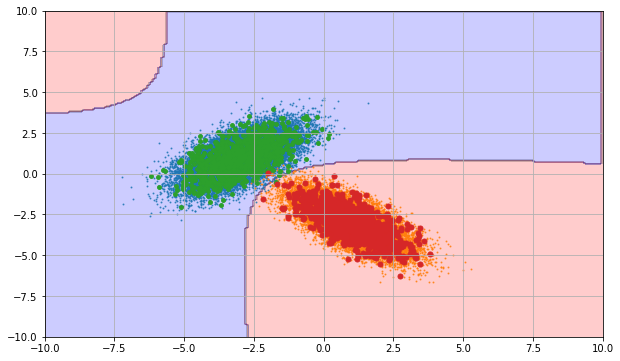

In [10]:
N = 20000
rand_x = np.random.rand(N,2)*20 -10

predictions = model.predict(rand_x)
print(np.shape(predictions))

plt.figure(figsize=[10,6])

#plt.scatter( rand_x[predictions[:,0]>predictions[:,1],0 ], rand_x[predictions[:,0]>predictions[:,1],1 ], alpha=0.04 )
#plt.scatter( rand_x[predictions[:,0]<predictions[:,1],0 ], rand_x[predictions[:,0]<predictions[:,1],1 ], alpha=0.04 )

plot_boundaries()

plt.scatter( x1[0], x1[1], s=1, alpha=0.75  )
plt.scatter( x2[0], x2[1], s=1, alpha=0.75 )

plt.scatter( tx1[0], tx1[1], s=15, alpha=1  )
plt.scatter( tx2[0], tx2[1], s=25, alpha=1 )

plt.grid(True)